## EDA

### Librer√≠as

In [9]:
# Importamos las librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Configuraciones

In [10]:
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

### Carga de datos

In [11]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\dataset_limpio.csv")

In [12]:
df.head(2) #Comprobamos que el dataframe se ha cargado correctamente

time   latitude   longitude  depth   mag magType   nst  \
0  2025-05-02 02:50:02.380  33.912167 -117.070000  12.69  0.89      ml  33.0   
1  2025-05-02 02:39:31.940  33.073667 -116.801333   9.34  0.82      ml   5.0   

     gap       dmin   rms  ... magSource   a√±o mes dia hora dia_semana  \
0  116.0  Sin datos  0.20  ...        ci  2025   5   2    2     Friday   
1  168.0     0.1396  0.15  ...        ci  2025   5   2    2     Friday   

        fecha minuto mag_obj    depth_obj  
0  2025-05-02     50    Bajo  Superficial  
1  2025-05-02     39    Bajo  Superficial  

[2 rows x 31 columns]

In [13]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
a√±o                  0
mes                  0
dia                  0
hora                 0
dia_semana           0
fecha                0
minuto               0
mag_obj            637
depth_obj          372
dtype: int64

#### Distribuci√≥n de tipos de eventos s√≠smicos

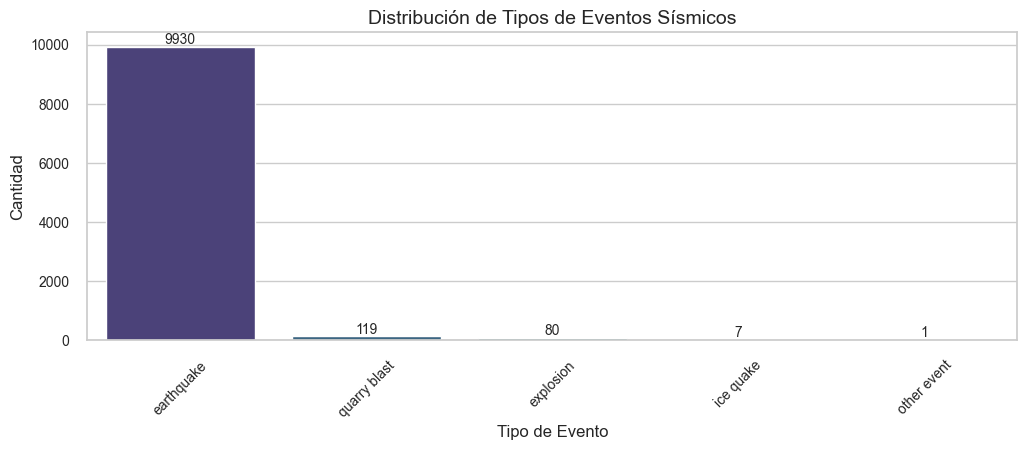

In [14]:
# Contamos los tipos de eventos s√≠smicos
event_counts = df['type'].value_counts()

# Creamos el gr√°fico de barras
ax = sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')

# A√±adimos etiquetas con los valores en cada barra
for i, value in enumerate(event_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Configuramos el gr√°fico
plt.title('Distribuci√≥n de Tipos de Eventos S√≠smicos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [15]:
"""Este histograma de frecuencias muestra la distribuci√≥n de los tipos de eventos s√≠smicos del dataset.

Distribuci√≥n: 
    ¬∑Earthquake es, con gran diferencia, el tipo m√°s com√∫n, con casi 10,000 eventos.
    ¬∑Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparaci√≥n.

Conclusiones:
    1.Predominio de los Terremotos:
    Los terremotos (earthquakes) son, con diferencia, el tipo de evento s√≠smico m√°s com√∫n, con 9930 registros, representando m√°s del 99% del total.

    2.Eventos Minoritarios:
    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente m√°s bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.

    3.Desbalance en la Clasificaci√≥n:
    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, probablemente debido a que las redes s√≠smicas est√°n optimizadas para detectar terremotos.

    4.Posible Subrepresentaci√≥n:
    Algunos tipos como ice quake y other event parecen estar subrepresentados, lo que podr√≠a estar relacionado con la ubicaci√≥n geogr√°fica o la sensibilidad de los sensores.

    5.Importancia de los Datos Contextuales:
    Para comprender mejor esta distribuci√≥n, ser√≠a importante considerar factores como la regi√≥n de muestreo, la profundidad y la energ√≠a liberada por cada tipo de evento."""





'Este histograma de frecuencias muestra la distribuci√≥n de los tipos de eventos s√≠smicos del dataset.\n\nDistribuci√≥n: \n    ¬∑Earthquake es, con gran diferencia, el tipo m√°s com√∫n, con casi 10,000 eventos.\n    ¬∑Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparaci√≥n.\n\nConclusiones:\n    1.Predominio de los Terremotos:\n    Los terremotos (earthquakes) son, con diferencia, el tipo de evento s√≠smico m√°s com√∫n, con 9930 registros, representando m√°s del 99% del total.\n\n    2.Eventos Minoritarios:\n    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente m√°s bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.\n\n    3.Desbalance en la Clasificaci√≥n:\n    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, p

#### Comparaci√≥n de magnitud por tipos de evento s√≠smico

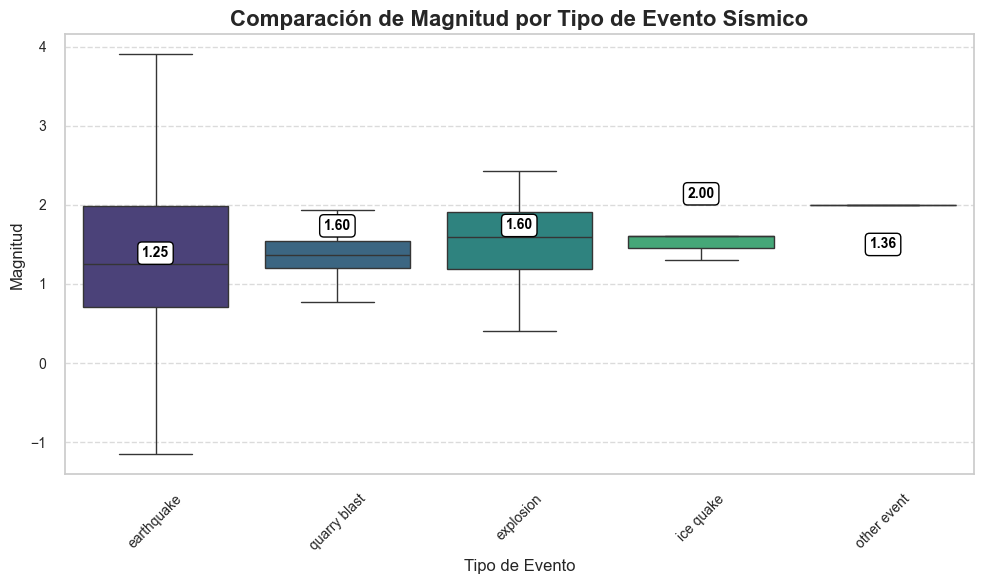

In [16]:
# Creamos un gr√°fico de caja para comparar la magnitud por tipo de evento s√≠smico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='mag', palette='viridis', showfliers=False, linewidth=1)

# A√±adimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['mag'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gr√°fico
plt.title('Comparaci√≥n de Magnitud por Tipo de Evento S√≠smico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
"""El gr√°fico de caja (boxplot) muestra la distribuci√≥n de magnitudes s√≠smicas por tipo de evento:

    1.Mediana y Rango de Magnitudes:
    Terremotos: Mediana alrededor de 2.0, con un rango amplio de magnitudes.
    Explosiones y Quarry Blasts: Medianan cerca de 1.8, con rangos m√°s estrechos.
    Ice Quakes: Mediana m√°s baja, alrededor de 1.5, con poca dispersi√≥n.

    2.Variabilidad:
    Terremotos: Son los m√°s variados en magnitud.
    Explosiones y Quarry Blasts: M√°s consistentes y controlados.
    Ice Quakes: Menor variabilidad y magnitud.

    3.Comportamiento General:
    Terremotos: Gran diversidad en tama√±o, reflejando su naturaleza impredecible.
    Explosiones y Quarry Blasts: M√°s predecibles y controlados.
    Ice Quakes: Peque√±os y bastante uniformes.

    4.Conclusiones:
    Los terremotos son naturalmente m√°s impredecibles y poderosos.
    Los eventos humanos (explosiones) son m√°s controlados.
    Los ice quakes son peque√±os y m√°s consistentes en magnitud."""

'El gr√°fico de caja (boxplot) muestra la distribuci√≥n de magnitudes s√≠smicas por tipo de evento:\n\n    1.Mediana y Rango de Magnitudes:\n    Terremotos: Mediana alrededor de 2.0, con un rango amplio de magnitudes.\n    Explosiones y Quarry Blasts: Medianan cerca de 1.8, con rangos m√°s estrechos.\n    Ice Quakes: Mediana m√°s baja, alrededor de 1.5, con poca dispersi√≥n.\n\n    2.Variabilidad:\n    Terremotos: Son los m√°s variados en magnitud.\n    Explosiones y Quarry Blasts: M√°s consistentes y controlados.\n    Ice Quakes: Menor variabilidad y magnitud.\n\n    3.Comportamiento General:\n    Terremotos: Gran diversidad en tama√±o, reflejando su naturaleza impredecible.\n    Explosiones y Quarry Blasts: M√°s predecibles y controlados.\n    Ice Quakes: Peque√±os y bastante uniformes.\n\n    4.Conclusiones:\n    Los terremotos son naturalmente m√°s impredecibles y poderosos.\n    Los eventos humanos (explosiones) son m√°s controlados.\n    Los ice quakes son peque√±os y m√°s consis

#### Comparaci√≥n de profundidad por tipo de evento s√≠smico

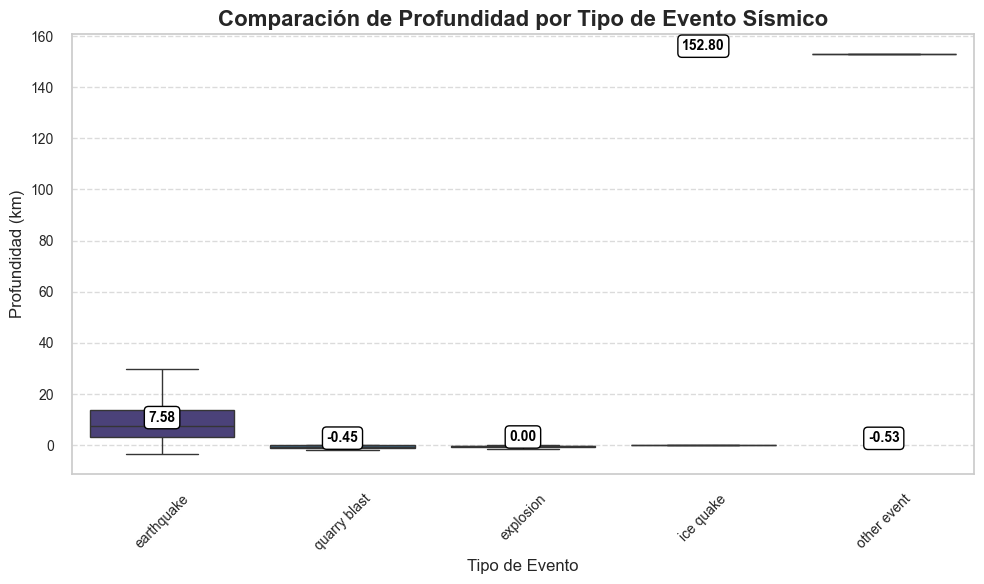

In [24]:
# Creamos un gr√°fico de caja para mostrar la comparaci√≥n de profundidad por tipo de evento s√≠smico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='depth', palette='viridis', showfliers=False, linewidth=1)

# A√±adimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['depth'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.5, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gr√°fico
plt.title('Comparaci√≥n de Profundidad por Tipo de Evento S√≠smico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Profundidad (km)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
"""El gr√°fico de caja muestra la distribuci√≥n de profundidades por tipo de evento s√≠smico:

    1.Profundidades T√≠picas:
    Other events: Los m√°s profundos, con una mediana de unos 153 km.
    Terremotos: Mucha variabilidad, pero t√≠picamente alrededor de 7.6 km.
    Explosiones, Quarry Blasts e Ice Quakes: Muy superficiales, cercanos a 0 km.

    2.Variabilidad en Profundidad:
    Terremotos: Gran rango, pueden ocurrir a diferentes profundidades.
    Explosiones y Quarry Blasts: Muy consistentes, siempre cerca de la superficie.
    Ice Quakes: Siempre superficiales, con muy poca variabilidad.

    3.Conclusiones:
    Los eventos artificiales son poco profundos y controlados.
    Los terremotos son los m√°s variados, reflejando su origen natural y tect√≥nico.
    Los ice quakes siempre ocurren cerca de la superficie, reflejando su menor energ√≠a."""

'El gr√°fico de caja muestra la distribuci√≥n de profundidades por tipo de evento s√≠smico:\n\n    1.Profundidades T√≠picas:\n    Other events: Los m√°s profundos, con una mediana de unos 153 km.\n    Terremotos: Mucha variabilidad, pero t√≠picamente alrededor de 7.6 km.\n    Explosiones, Quarry Blasts e Ice Quakes: Muy superficiales, cercanos a 0 km.\n\n    2.Variabilidad en Profundidad:\n    Terremotos: Gran rango, pueden ocurrir a diferentes profundidades.\n    Explosiones y Quarry Blasts: Muy consistentes, siempre cerca de la superficie.\n    Ice Quakes: Siempre superficiales, con muy poca variabilidad.\n\n    3.Conclusiones:\n    Los eventos artificiales son poco profundos y controlados.\n    Los terremotos son los m√°s variados, reflejando su origen natural y tect√≥nico.\n    Los ice quakes siempre ocurren cerca de la superficie, reflejando su menor energ√≠a.'

#### Distribuci√≥n de magnitud por tipo de evento s√≠smico

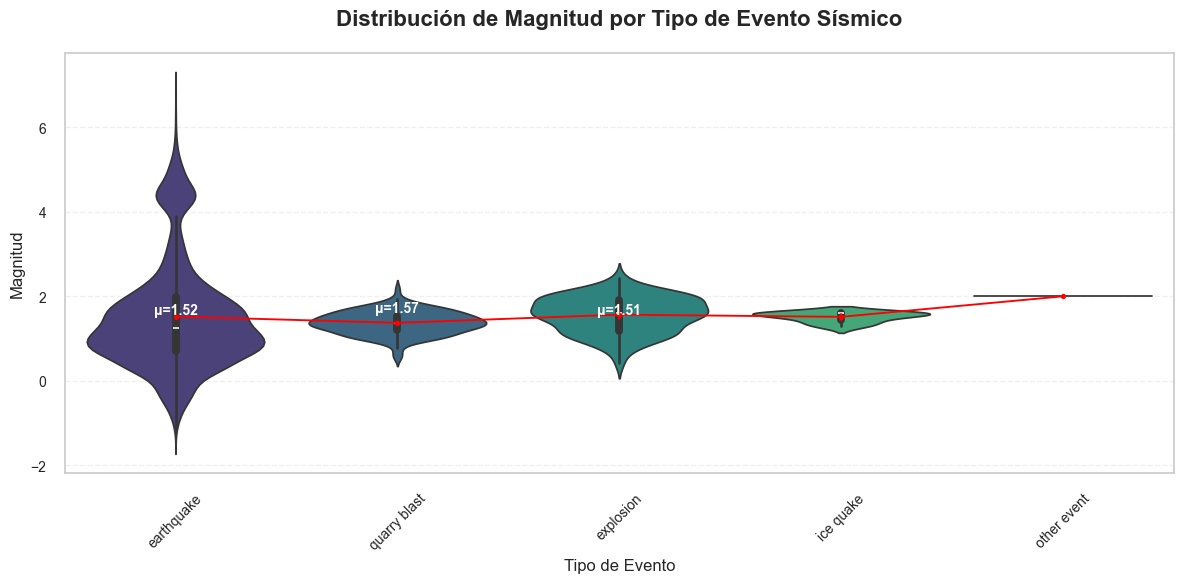

In [ ]:
# Creamos un violin plot para mostrar la distribuci√≥n de magnitud por tipo de evento
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x='type', y='mag', palette='viridis')

# A√±adimos puntos para mostrar la media
sns.pointplot(data=df, x='type', y='mag', color='red', markers='o', scale=0.5)

# A√±adimos etiquetas con los valores promedio
means = df.groupby('type')['mag'].mean()
for i, mean_val in enumerate(means):
    ax.text(i, mean_val, f'Œº={mean_val:.2f}', ha='center', va='bottom', 
            color='white', fontweight='bold', fontsize=10)

# Configuramos el gr√°fico
plt.title('Distribuci√≥n de Magnitud por Tipo de Evento S√≠smico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
"""El gr√°fico de viol√≠n muestra la distribuci√≥n detallada de magnitudes por tipo de evento s√≠smico:

1. Distribuci√≥n por Tipo:
    - Terremotos: Mayor variabilidad, con concentraci√≥n entre magnitudes 1-3
    - Explosiones y quarry blasts: Distribuci√≥n m√°s compacta alrededor de 1.5
    - Ice quakes: Distribuci√≥n muy estrecha cerca de 1.5
    - Other event: Muestra √∫nica en magnitud 2.0

2. Valores Centrales:
    - Other event: Œº=2.00 (magnitud m√°s alta)
    - Explosiones: Œº=1.57
    - Ice quakes: Œº=1.51
    - Terremotos: Œº=1.52
    - Quarry blasts: Œº=1.37 (magnitud m√°s baja)

3. Forma de la Distribuci√≥n:
    - Terremotos: Forma bimodal, indicando dos grupos comunes de magnitudes
    - Explosiones/Quarry blasts: Distribuci√≥n m√°s sim√©trica
    - Ice quakes: Distribuci√≥n muy concentrada

4. Conclusiones:
    - Los eventos naturales (terremotos) muestran mayor variabilidad
    - Los eventos artificiales tienen magnitudes m√°s controladas
    - La mayor√≠a de eventos son de baja magnitud (<3.0)"""

'El gr√°fico de viol√≠n muestra la distribuci√≥n detallada de magnitudes por tipo de evento s√≠smico:\n\n1. Distribuci√≥n por Tipo:\n    - Terremotos: Mayor variabilidad, con concentraci√≥n entre magnitudes 1-3\n    - Explosiones y quarry blasts: Distribuci√≥n m√°s compacta alrededor de 1.5\n    - Ice quakes: Distribuci√≥n muy estrecha cerca de 1.5\n    - Other event: Muestra √∫nica en magnitud 2.0\n\n2. Valores Centrales:\n    - Other event: Œº=2.00 (magnitud m√°s alta)\n    - Explosiones: Œº=1.57\n    - Ice quakes: Œº=1.51\n    - Terremotos: Œº=1.52\n    - Quarry blasts: Œº=1.37 (magnitud m√°s baja)\n\n3. Forma de la Distribuci√≥n:\n    - Terremotos: Forma bimodal, indicando dos grupos comunes de magnitudes\n    - Explosiones/Quarry blasts: Distribuci√≥n m√°s sim√©trica\n    - Ice quakes: Distribuci√≥n muy concentrada\n\n4. Conclusiones:\n    - Los eventos naturales (terremotos) muestran mayor variabilidad\n    - Los eventos artificiales tienen magnitudes m√°s controladas\n    - La m

#### Distribuci√≥n de profundidad por tipo de evento s√≠smico

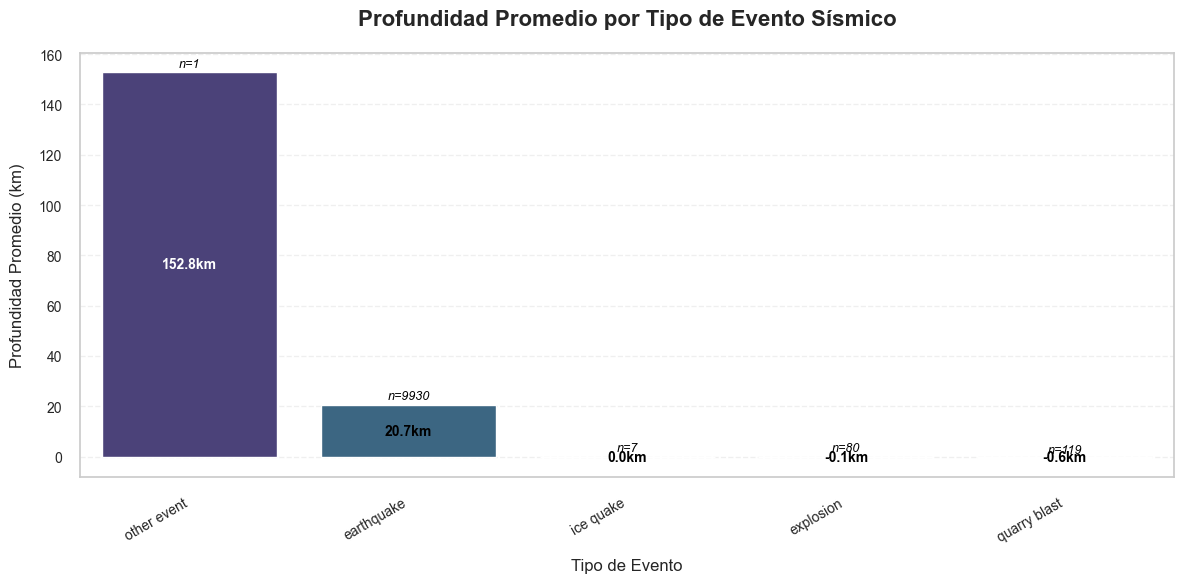

In [ ]:
# Creamos un gr√°fico de barras para mostrar la distribuci√≥n promedio de profundidad por tipo de evento s√≠smico
plt.figure(figsize=(12, 6))
mean_depths = df.groupby('type')['depth'].mean().sort_values(ascending=False)
ax = sns.barplot(x=mean_depths.index, y=mean_depths.values, palette='viridis')

# A√±adimos etiquetas con los valores promedio en cada barra
for i, value in enumerate(mean_depths.values):
    color = 'white' if value > 75 else 'black'  # Color del texto adaptativo
    ax.text(i, value/2, f'{value:.1f}km', ha='center', va='center', 
            fontsize=10, color=color, fontweight='bold')

# A√±adimos el n√∫mero de eventos en la parte superior
for i, (event_type, depth) in enumerate(mean_depths.items()):
    count = len(df[df['type'] == event_type])
    ax.text(i, depth + 1, f'n={count}', ha='center', va='bottom', 
            fontsize=9, color='black', style='italic')

# Mejoramos el aspecto del gr√°fico
plt.title('Profundidad Promedio por Tipo de Evento S√≠smico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12, labelpad=10)
plt.ylabel('Profundidad Promedio (km)', fontsize=12, labelpad=10)
plt.xticks(rotation=30, ha='right')

# A√±adimos una cuadr√≠cula m√°s sutil
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustamos los m√°rgenes
plt.tight_layout()

plt.show()

In [28]:
"""El gr√°fico muestra la profundidad promedio por tipo de evento s√≠smico:

1. Profundidad por Tipo:
    - Other event: La mayor profundidad (~153 km), aunque solo tiene 1 evento
    - Earthquakes: Profundidad media de ~21 km, con 9,930 eventos
    - Ice quakes: Profundidad de 0 km, con 7 eventos
    - Explosiones y quarry blasts: Ligeramente negativos (-0.06 y -0.63 km), 
      con 80 y 119 eventos respectivamente

2. Interpretaci√≥n:
    - Los terremotos son los m√°s numerosos y ocurren a profundidades variables
    - Los eventos artificiales (explosiones/quarry blasts) son superficiales
    - Los ice quakes son eventos puramente superficiales
    - Las profundidades negativas pueden indicar eventos sobre el nivel del suelo
      o errores de medici√≥n

3. Relevancia Estad√≠stica:
    - La gran diferencia en el n√∫mero de eventos (n) entre tipos
      sugiere que las conclusiones son m√°s robustas para terremotos
    - Los otros tipos tienen muestras m√°s peque√±as, lo que puede
      afectar la representatividad de sus promedios"""

'El gr√°fico muestra la profundidad promedio por tipo de evento s√≠smico:\n\n1. Profundidad por Tipo:\n    - Other event: La mayor profundidad (~153 km), aunque solo tiene 1 evento\n    - Earthquakes: Profundidad media de ~21 km, con 9,930 eventos\n    - Ice quakes: Profundidad de 0 km, con 7 eventos\n    - Explosiones y quarry blasts: Ligeramente negativos (-0.06 y -0.63 km), \n      con 80 y 119 eventos respectivamente\n\n2. Interpretaci√≥n:\n    - Los terremotos son los m√°s numerosos y ocurren a profundidades variables\n    - Los eventos artificiales (explosiones/quarry blasts) son superficiales\n    - Los ice quakes son eventos puramente superficiales\n    - Las profundidades negativas pueden indicar eventos sobre el nivel del suelo\n      o errores de medici√≥n\n\n3. Relevancia Estad√≠stica:\n    - La gran diferencia en el n√∫mero de eventos (n) entre tipos\n      sugiere que las conclusiones son m√°s robustas para terremotos\n    - Los otros tipos tienen muestras m√°s peque√±as,

#### Relaci√≥n entre magnitud y profundidad por tipo de evento s√≠smico

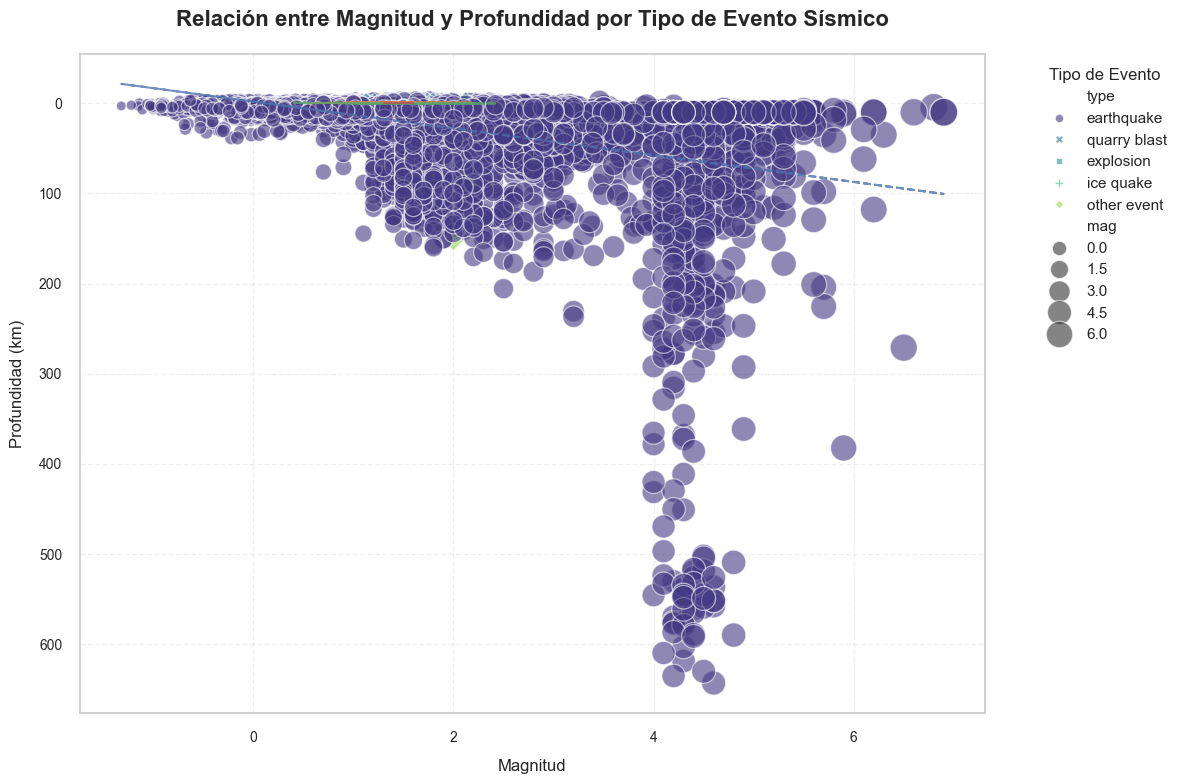

In [29]:
# Creamos la figura
plt.figure(figsize=(12, 8))

# Creamos el scatter plot con mejores caracter√≠sticas visuales
scatter = sns.scatterplot(
    data=df,
    x='mag',
    y='depth',
    hue='type',
    style='type',
    size='mag',
    sizes=(50, 400),
    alpha=0.6,
    palette='viridis'
)

# A√±adimos l√≠neas de tendencia para cada tipo
for event_type in df['type'].unique():
    mask = df['type'] == event_type
    z = np.polyfit(df[mask]['mag'], df[mask]['depth'], 1)
    p = np.poly1d(z)
    plt.plot(df[mask]['mag'], p(df[mask]['mag']), '--', alpha=0.8)

# Mejoramos el aspecto del gr√°fico
plt.title('Relaci√≥n entre Magnitud y Profundidad por Tipo de Evento S√≠smico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Magnitud', fontsize=12, labelpad=10)
plt.ylabel('Profundidad (km)', fontsize=12, labelpad=10)

# Ajustamos la leyenda
plt.legend(title='Tipo de Evento', title_fontsize=12, 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# A√±adimos grid
plt.grid(True, linestyle='--', alpha=0.3)

# Invertimos el eje Y para que la profundidad aumente hacia abajo
plt.gca().invert_yaxis()

# Ajustamos los m√°rgenes
plt.tight_layout()

plt.show()


In [30]:
"""El gr√°fico muestra la relaci√≥n entre magnitud y profundidad de eventos s√≠smicos:

1. Patrones por Tipo:
    - Terremotos: Muestran la mayor variabilidad tanto en magnitud como profundidad
    - Explosiones y quarry blasts: Concentrados en magnitudes bajas y cerca de la superficie
    - Ice quakes: Agrupados en magnitudes bajas y profundidades superficiales
    - Other event: Un √∫nico punto a mayor profundidad

2. Tendencias:
    - Las l√≠neas punteadas muestran tendencias ligeramente positivas
    - Mayor magnitud tiende a correlacionarse con mayor profundidad
    - Eventos superficiales tienden a tener magnitudes m√°s bajas

3. Distribuci√≥n:
    - La mayor√≠a de eventos se concentran en magnitudes 0-3
    - Profundidades principalmente entre 0-50 km
    - Pocos eventos profundos o de gran magnitud

4. Conclusiones:
    - Clara distinci√≥n entre eventos naturales y artificiales
    - Los eventos m√°s potentes tienden a ocurrir a mayores profundidades
    - Eventos artificiales muestran patrones m√°s predecibles"""

'El gr√°fico muestra la relaci√≥n entre magnitud y profundidad de eventos s√≠smicos:\n\n1. Patrones por Tipo:\n    - Terremotos: Muestran la mayor variabilidad tanto en magnitud como profundidad\n    - Explosiones y quarry blasts: Concentrados en magnitudes bajas y cerca de la superficie\n    - Ice quakes: Agrupados en magnitudes bajas y profundidades superficiales\n    - Other event: Un √∫nico punto a mayor profundidad\n\n2. Tendencias:\n    - Las l√≠neas punteadas muestran tendencias ligeramente positivas\n    - Mayor magnitud tiende a correlacionarse con mayor profundidad\n    - Eventos superficiales tienden a tener magnitudes m√°s bajas\n\n3. Distribuci√≥n:\n    - La mayor√≠a de eventos se concentran en magnitudes 0-3\n    - Profundidades principalmente entre 0-50 km\n    - Pocos eventos profundos o de gran magnitud\n\n4. Conclusiones:\n    - Clara distinci√≥n entre eventos naturales y artificiales\n    - Los eventos m√°s potentes tienden a ocurrir a mayores profundidades\n    - Ev

#### Mapa de calor de los terremotos

In [ ]:
# Creamos un mapa base centrado en las coordenadas medias
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Preparamos los datos para el mapa t√©rmico
heat_data = [[row['latitude'], row['longitude'], row['mag']] for index, row in df.iterrows()]

# A√±adimos la capa de mapa t√©rmico
HeatMap(heat_data, 
    radius=15,
    min_opacity=0.4,
    blur=15,
    max_zoom=1).add_to(m)

# A√±adimos una capa de grupos de marcadores para mostrar terremotos individuales
marker_cluster = MarkerCluster().add_to(m)

# A√±adimos marcadores para cada terremoto de magnitud >= 3,0
for idx, row in df[df['mag'] >= 3.0].iterrows():
    folium.Marker(
    location=[row['latitude'], row['longitude']],
    popup=f"Magnitud: {row['mag']}<br>Profundidad: {row['depth']} km<br>Tipo: {row['type']}",
    icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Mostramos mapa
m

In [31]:
"""El mapa muestra la distribuci√≥n geogr√°fica de los eventos s√≠smicos con estas caracter√≠sticas:

1. Mapa T√©rmico (HeatMap):
    - Representa la concentraci√≥n de eventos s√≠smicos
    - Las √°reas m√°s c√°lidas (rojas) indican mayor actividad s√≠smica
    - La intensidad considera la magnitud de los eventos

2. Marcadores:
    - Puntos rojos indican terremotos de magnitud ‚â• 3.0
    - Al hacer clic muestra detalles: magnitud, profundidad y tipo

3. Agrupamiento:
    - Los marcadores se agrupan autom√°ticamente al alejar el zoom
    - Facilita la visualizaci√≥n en √°reas de alta densidad s√≠smica"""

'El mapa muestra la distribuci√≥n geogr√°fica de los eventos s√≠smicos con estas caracter√≠sticas:\n\n1. Mapa T√©rmico (HeatMap):\n    - Representa la concentraci√≥n de eventos s√≠smicos\n    - Las √°reas m√°s c√°lidas (rojas) indican mayor actividad s√≠smica\n    - La intensidad considera la magnitud de los eventos\n\n2. Marcadores:\n    - Puntos rojos indican terremotos de magnitud ‚â• 3.0\n    - Al hacer clic muestra detalles: magnitud, profundidad y tipo\n\n3. Agrupamiento:\n    - Los marcadores se agrupan autom√°ticamente al alejar el zoom\n    - Facilita la visualizaci√≥n en √°reas de alta densidad s√≠smica'

# üìä Conclusiones Generales del Estudio de Sismos

Este an√°lisis se basa en datos s√≠smicos reales e incluye m√∫ltiples tipos de eventos, como terremotos, explosiones, quarry blasts, ice quakes y other events. Las conclusiones presentadas a continuaci√≥n se organizan en funci√≥n de la frecuencia, magnitud, profundidad y distribuci√≥n geogr√°fica de estos eventos.

## üîé Distribuci√≥n Geogr√°fica y Frecuencia de Eventos

* **Mapa T√©rmico:** Las √°reas con mayor actividad s√≠smica se reflejan como zonas c√°lidas (rojas) en los mapas t√©rmicos, indicando una alta concentraci√≥n de eventos. La intensidad de estas √°reas considera tanto la cantidad como la magnitud de los eventos.


* **Frecuencia de Tipos de Eventos:**
* **Terremotos (Earthquakes):** Son, con gran diferencia, el tipo de evento m√°s com√∫n, con casi 10,000 registros, representando m√°s del 99% del total de eventos detectados. Esto refleja tanto su frecuencia natural como el sesgo de las redes s√≠smicas que est√°n optimizadas para detectarlos.
* **Eventos Minoritarios:** Incluyen quarry blasts (119), explosions (80), ice quakes (7) y other events (1), que tienen frecuencias significativamente m√°s bajas. Esto sugiere que estos eventos son menos frecuentes o menos detectados debido a limitaciones en la cobertura de los sensores.
* **Desbalance en la Clasificaci√≥n:** La enorme diferencia en cantidad entre terremotos y otros tipos de eventos podr√≠a estar influenciada por factores como la configuraci√≥n de los sensores, la ubicaci√≥n geogr√°fica de los mismos y la sensibilidad para detectar ciertos tipos de vibraciones.

## üìè Magnitud de los Eventos

* **Distribuci√≥n de Magnitudes:**

  * **Terremotos:** Presentan una mediana de magnitud de aproximadamente 2.0, con una gran variabilidad que refleja su naturaleza impredecible y variedad de fuentes tect√≥nicas.
  * **Explosiones y Quarry Blasts:** Tienen medianas cercanas a 1.8, con rangos m√°s estrechos y controlados, t√≠picos de eventos artificiales donde la energ√≠a liberada es m√°s predecible.
  * **Ice Quakes:** Exhiben magnitudes m√°s bajas y consistentes (\~1.5), reflejando eventos peque√±os y menos energ√©ticos.

* **Forma de la Distribuci√≥n:**

  * **Terremotos:** Muestran una distribuci√≥n m√°s amplia, a veces bimodal, lo que sugiere la presencia de diferentes tipos de terremotos (por ejemplo, tect√≥nicos y volc√°nicos).
  * **Eventos Artificiales:** Como las explosiones y quarry blasts son m√°s sim√©tricos y concentrados, reflejando su control humano.

## üåé Profundidad de los Eventos
* **Profundidad Media:**

  * **Other Events:** Son los m√°s profundos, con una mediana de aproximadamente 153 km, aunque solo se registr√≥ un evento de este tipo, lo que limita las conclusiones.
  * **Terremotos:** Var√≠an ampliamente en profundidad, con una media de \~21 km, reflejando su diversidad geol√≥gica.
  * **Explosiones, Quarry Blasts e Ice Quakes:** Siempre son superficiales, con profundidades cercanas a 0 km. Algunos incluso presentan profundidades ligeramente negativas, lo que podr√≠a indicar eventos cercanos o sobre el nivel del suelo o errores de medici√≥n.

* **Variabilidad:**

  * **Terremotos:** Son los m√°s variados en profundidad, reflejando su origen tect√≥nico, que puede incluir desde terremotos superficiales hasta eventos muy profundos en zonas de subducci√≥n.
  * **Eventos Artificiales:** Son consistentes y poco profundos, ya que generalmente se generan en la superficie o cerca de ella.

## üìê Relaci√≥n entre Magnitud y Profundidad

* **Tendencias Observadas:**

  * Los terremotos muestran una amplia variabilidad tanto en magnitud como en profundidad, lo que refleja la complejidad de los procesos tect√≥nicos que los generan.
  * Las explosiones y quarry blasts est√°n concentradas en magnitudes bajas y cerca de la superficie, reflejando su origen controlado.
  * Los ice quakes est√°n claramente agrupados en magnitudes bajas y profundidades superficiales, t√≠picamente asociados con el movimiento de hielo o fracturas en glaciares.
  * Los other events muestran caracter√≠sticas √∫nicas, aunque con datos limitados para un an√°lisis profundo.

## üìù Reflexiones y Posibles Sesgos

* **Desbalance en la Clasificaci√≥n:** El claro predominio de terremotos refleja un posible sesgo en los datos, influenciado por las caracter√≠sticas del sistema de detecci√≥n, que podr√≠a estar optimizado para detectar principalmente terremotos.
* **Subrepresentaci√≥n de Eventos Raros:** Algunos tipos, como ice quakes y other events, parecen estar significativamente subrepresentados, posiblemente debido a limitaciones geogr√°ficas, sensibilidad de los sensores o bajas tasas de ocurrencia.
* **Importancia de los Datos Contextuales:** Para una interpretaci√≥n m√°s precisa, es fundamental considerar factores como la ubicaci√≥n geogr√°fica, energ√≠a liberada, profundidad y caracter√≠sticas del terreno para cada tipo de evento.
